<a href="https://colab.research.google.com/github/1998456/1998456/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sales= pd.read_csv("https://raw.githubusercontent.com/sushantag9/Supermarket-Sales-Data-Analysis/master/supermarket_sales%20-%20Sheet1.csv")
sales.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [3]:
sales["City"].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [4]:
sales["Product line"]

0           Health and beauty
1      Electronic accessories
2          Home and lifestyle
3           Health and beauty
4           Sports and travel
                ...          
995         Health and beauty
996        Home and lifestyle
997        Food and beverages
998        Home and lifestyle
999       Fashion accessories
Name: Product line, Length: 1000, dtype: object

# EDA

Checking City with more Male/Female shoppers;

In [5]:
sales.groupby(["Gender","City"]).count()

Invoice ID  Branch  Customer type  Product line  Unit price  \
Gender City                                                                     
Female Mandalay          162     162            162           162         162   
       Naypyitaw         178     178            178           178         178   
       Yangon            161     161            161           161         161   
Male   Mandalay          170     170            170           170         170   
       Naypyitaw         150     150            150           150         150   
       Yangon            179     179            179           179         179   

                  Quantity  Tax 5%  Total  Date  Time  Payment  cogs  \
Gender City                                                            
Female Mandalay        162     162    162   162   162      162   162   
       Naypyitaw       178     178    178   178   178      178   178   
       Yangon          161     161    161   161   161      161   161   
Male   Mandalay        170     170    170   170   170      170   170   
       Naypyitaw       150     150    150   150   150      150   150   
       Yangon          179     179    179   179   179      179   179   

                  gross margin percentage  gross income  Rating  
Gender City                                                      
Female Mandalay                       162           162     162  
       Naypyitaw                      178           178     178  
       Yangon                         161           161     161  
Male   Mandalay                       170           170     170  
       Naypyitaw                      150           150     150  
       Yangon                         179           179     179

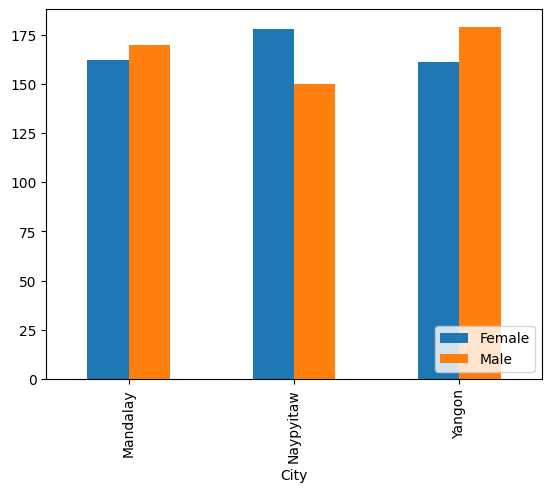

In [6]:
gender_shop=sales.groupby(["Gender","City"]).count()["Customer type"].unstack(level=0).plot(kind="bar")
plt.legend(loc="lower right")

Checking Gender that spends more;

In [7]:
sales.groupby("Gender").sum()

<ipython-input-7-c1feaeca7d9e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales.groupby("Gender").sum()


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Gender,,,,,,,,
Female,27687.24,2869,7994.425,167882.925,159888.50,2385.714286,7994.425,3489.2
Male,27984.89,2641,7384.944,155083.824,147698.88,2376.190476,7384.944,3483.5


<ipython-input-8-b0ead076b4db>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_spending=sales.groupby("Gender").sum()["Total"]


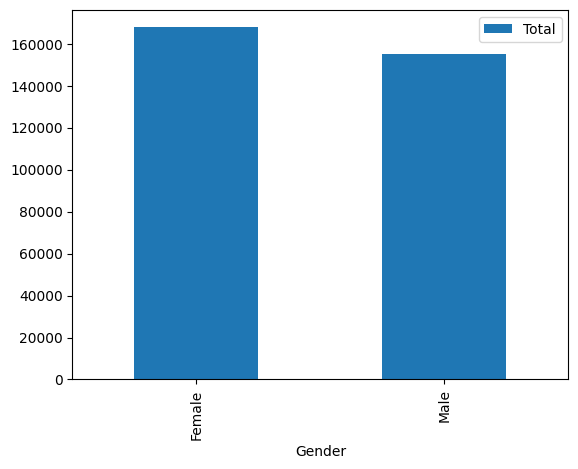

In [8]:
gender_spending=sales.groupby("Gender").sum()["Total"]
gender_spending.plot(kind="bar")
plt.legend()

Checking Member that spends more;

In [9]:
sales.groupby("Customer type").sum()

<ipython-input-9-4171800bda18>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales.groupby("Customer type").sum()


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Customer type,,,,,,,,
Member,28159.70,2785,7820.164,164223.444,156403.28,2385.714286,7820.164,3477.1
Normal,27512.43,2725,7559.205,158743.305,151184.10,2376.190476,7559.205,3495.6


<ipython-input-10-339bb4d4befe>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  C_type_spending=sales.groupby("Customer type").sum()["Total"]


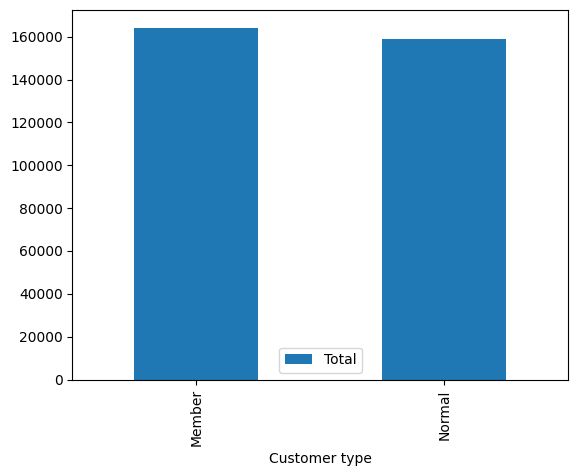

In [10]:
C_type_spending=sales.groupby("Customer type").sum()["Total"]
C_type_spending.plot(kind="bar")
plt.legend()

Checking Product that sells more;

In [11]:
sales.groupby("Product line").count()

,Invoice ID,Branch,City,Customer type,Gender,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Product line,,,,,,,,,,,,,,,,
Electronic accessories,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170
Fashion accessories,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178
Food and beverages,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174
Health and beauty,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152
Home and lifestyle,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160
Sports and travel,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166


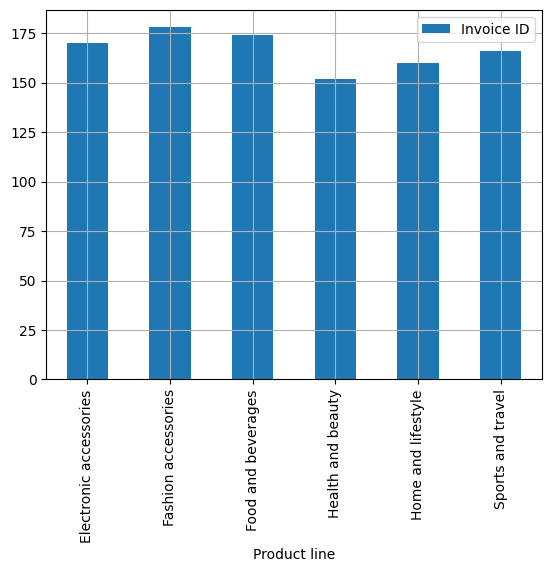

In [12]:
P_sales=sales.groupby("Product line").count()["Invoice ID"]
P_sales.plot(kind="bar")
plt.grid()
plt.legend()

Checking Product_Line Popularity among Men vs Women;

In [13]:
sales.groupby(["Gender","Product line"]).count()

Invoice ID  Branch  City  Customer type  \
Gender Product line                                                      
Female Electronic accessories          84      84    84             84   
       Fashion accessories             96      96    96             96   
       Food and beverages              90      90    90             90   
       Health and beauty               64      64    64             64   
       Home and lifestyle              79      79    79             79   
       Sports and travel               88      88    88             88   
Male   Electronic accessories          86      86    86             86   
       Fashion accessories             82      82    82             82   
       Food and beverages              84      84    84             84   
       Health and beauty               88      88    88             88   
       Home and lifestyle              81      81    81             81   
       Sports and travel               78      78    78             78   

                               Unit price  Quantity  Tax 5%  Total  Date  \
Gender Product line                                                        
Female Electronic accessories          84        84      84     84    84   
       Fashion accessories             96        96      96     96    96   
       Food and beverages              90        90      90     90    90   
       Health and beauty               64        64      64     64    64   
       Home and lifestyle              79        79      79     79    79   
       Sports and travel               88        88      88     88    88   
Male   Electronic accessories          86        86      86     86    86   
       Fashion accessories             82        82      82     82    82   
       Food and beverages              84        84      84     84    84   
       Health and beauty               88        88      88     88    88   
       Home and lifestyle              81        81      81     81    81   
       Sports and travel               78        78      78     78    78   

                               Time  Payment  cogs  gross margin percentage  \
Gender Product line                                                           
Female Electronic accessories    84       84    84                       84   
       Fashion accessories       96       96    96                       96   
       Food and beverages        90       90    90                       90   
       Health and beauty         64       64    64                       64   
       Home and lifestyle        79       79    79                       79   
       Sports and travel         88       88    88                       88   
Male   Electronic accessories    86       86    86                       86   
       Fashion accessories       82       82    82                       82   
       Food and beverages        84       84    84                       84   
       Health and beauty         88       88    88                       88   
       Home and lifestyle        81       81    81                       81   
       Sports and travel         78       78    78                       78   

                               gross income  Rating  
Gender Product line                                  
Female Electronic accessories            84      84  
       Fashion accessories               96      96  
       Food and beverages                90      90  
       Health and beauty                 64      64  
       Home and lifestyle                79      79  
       Sports and travel                 88      88  
Male   Electronic accessories            86      86  
       Fashion accessories               82      82  
       Food and beverages                84      84  
       Health and beauty                 88      88  
       Home and lifestyle                81      81  
       Sports and travel                 78      78

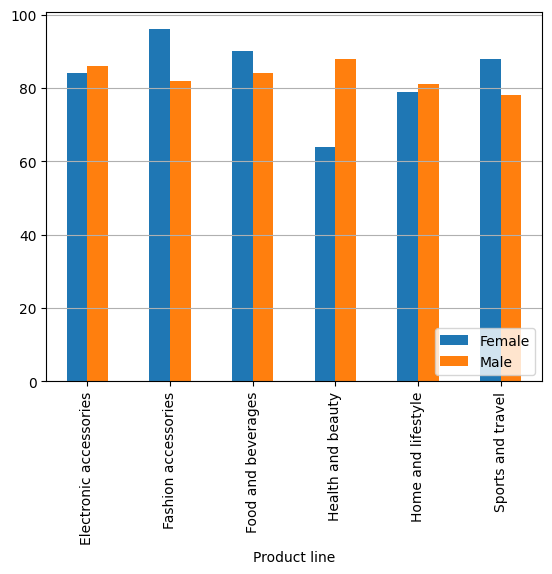

In [14]:
P_line_pop=sales.groupby(["Gender","Product line"]).count()["City"].unstack(level=0).plot(kind="bar")
plt.grid(axis="y")
plt.legend(loc="lower right")

Checking Month & Day making the most sales;

In [15]:
# Activating Date_Column;
type(sales.iloc[0,0])

str

In [16]:
pd.to_datetime(sales["Date"])

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [17]:

# Extracting Day Column;
sales["Day"]= pd.to_datetime(sales["Date"]).dt.day
sales["Month"]=pd.to_datetime(sales["Date"]).dt.month

In [18]:
sales.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,2
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,25,3
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8,25,2
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0,24,2
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2,10,1
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9,20,2


<ipython-input-19-320ae1306ee9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  D_sales= sales.groupby("Day").sum()["Total"]


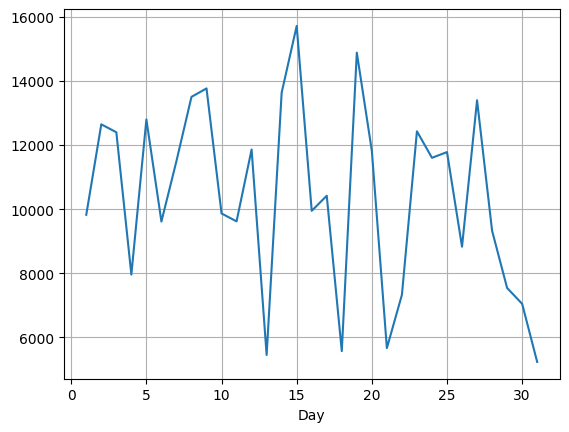

In [19]:

# Day with most sales;
D_sales= sales.groupby("Day").sum()["Total"]
D_sales.plot()
plt.grid()

<ipython-input-20-70beafa8b902>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  M_sales= sales.groupby("Month").sum()["Total"]


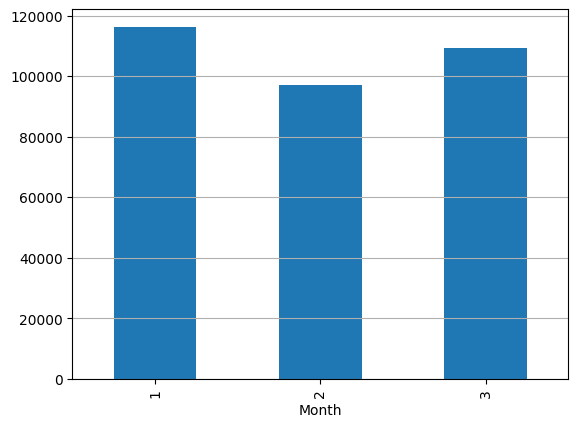

In [20]:
# Month with most sales;
M_sales= sales.groupby("Month").sum()["Total"]
M_sales.plot(kind="bar")
plt.grid(axis="y")

Checking Hour with most Sales;

In [22]:
# Extracting Hour Column;
sales["Time"]
sales["Hour"]= pd.to_datetime(sales["Time"]).dt.hour

In [23]:
sales.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,1,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,2,10
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,25,3,18
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8,25,2,14
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0,24,2,11
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2,10,1,17
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9,20,2,13


<ipython-input-24-5749699ba45e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  H_sales= sales.groupby("Hour").sum()["Total"]


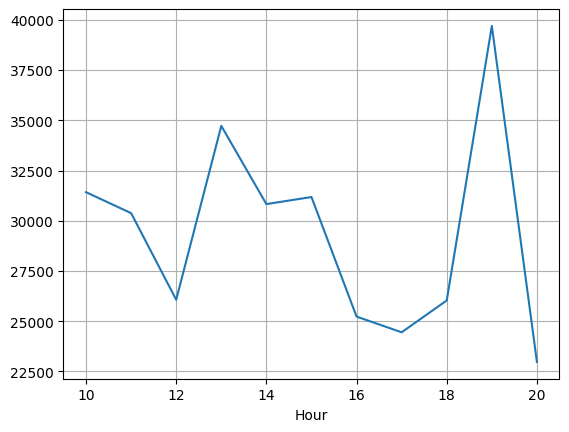

In [24]:
H_sales= sales.groupby("Hour").sum()["Total"]
H_sales.plot()
plt.grid()

Checking Time with the highest & Lowest payment

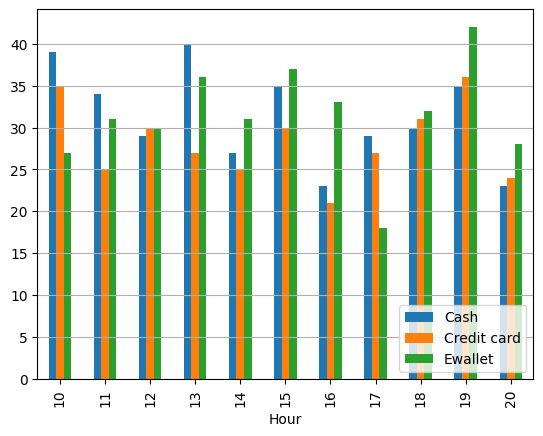

In [25]:
sales.groupby(["Payment","Hour"]).count()["Customer type"].unstack(level=0).plot(kind="bar")
plt.grid(axis="y")
plt.legend(loc="lower right")

Checking City with Best Rating;

<ipython-input-27-1ae8b8743f1d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  C_Rating= sales.groupby(["City"]).mean()["Rating"]


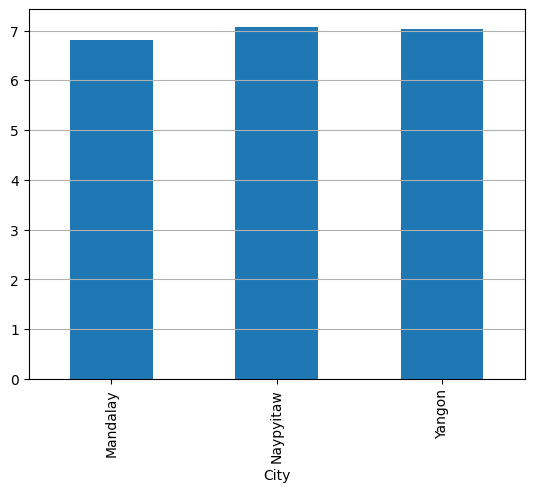

In [27]:
C_Rating= sales.groupby(["City"]).mean()["Rating"]
C_Rating.plot(kind="bar")
plt.grid(axis="y")